In [1]:
#prerequisites
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble  import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score
df = pd.read_csv("uber.csv")
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [2]:
#data preprocessing
df= df.drop(columns=["Unnamed: 0","key"])
df.head()
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df.dropna(inplace=True)
df.head()
df= df[(df["fare_amount"] > 0) & (df["passenger_count"] > 0) & (df["passenger_count"] < 6)]
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


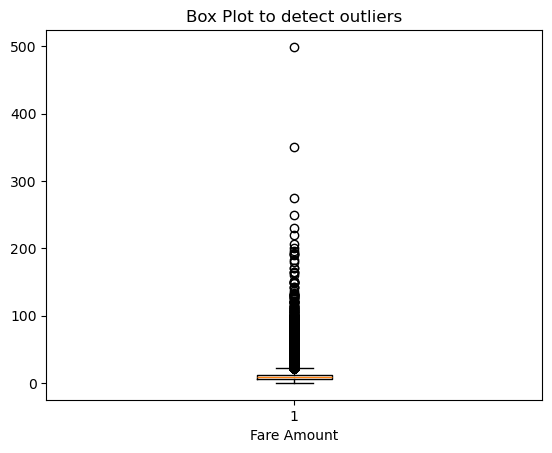

In [3]:
#identifying outliers(via box plot)
plt.boxplot(df["fare_amount"])
plt.title("Box Plot to detect outliers")
plt.xlabel("Fare Amount")
plt.show()

In [4]:
#via IQR
Q1 = df["fare_amount"].quantile(0.25)
Q3 = df["fare_amount"].quantile(0.75) 
IQR =  Q3 -Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR 
outliers = df[(df["fare_amount"] < lower) | (df["fare_amount"] > upper)]
print("Outliers : ",outliers)

Outliers :          fare_amount           pickup_datetime  pickup_longitude  \
6             24.50 2014-10-12 07:04:00+00:00        -73.961447   
30            25.70 2011-05-21 09:00:00+00:00        -73.944815   
34            39.50 2014-06-04 06:49:00+00:00        -73.788080   
39            29.00 2014-02-13 17:57:00+00:00        -73.992600   
48            56.80 2013-01-03 22:24:41+00:00        -73.993498   
...             ...                       ...               ...   
199976        49.70 2011-10-18 23:53:00+00:00        -73.978225   
199977        43.50 2012-11-20 21:04:30+00:00        -73.996671   
199982        57.33 2014-08-06 11:06:06+00:00        -73.969204   
199985        24.00 2015-04-18 15:16:06+00:00        -74.005089   
199997        30.90 2009-06-29 00:42:00+00:00        -73.986017   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
6             40.693965         -73.871195         40.774297                5  
30            40.834367

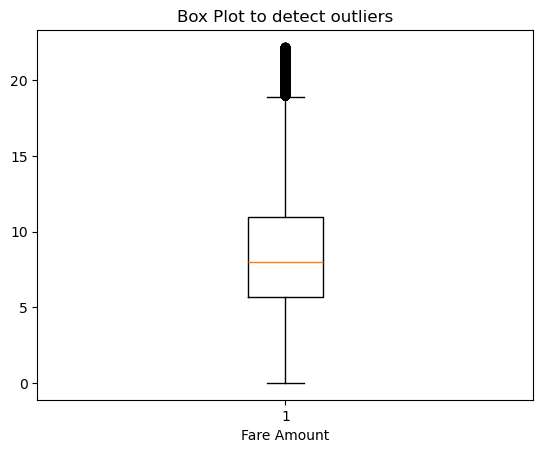

In [5]:
#removing outliers 
df=df[(df["fare_amount"] >= lower) & (df["fare_amount"] <= upper)]
#identifying outliers(via box plot)
plt.boxplot(df["fare_amount"])
plt.title("Box Plot to detect outliers")
plt.xlabel("Fare Amount")
plt.show()

In [6]:
 #model preparation
x = df.drop("fare_amount",axis=1)
y = df["fare_amount"]
x["pickup_datetime"] = pd.to_numeric(x["pickup_datetime"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
linearRegressionModel = LinearRegression()


In [7]:
#test the model 
linearRegressionModel.fit(x_train,y_train)

LinearRegression()

In [8]:
#make predictions
y_pred= linearRegressionModel.predict(x_test)

In [9]:
#evaluate the results of the model 
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE SCORE OF LINEAR REGRESSION MODEL : ",rmse)
print("R2 SCORE OF LINEAR REGRESSION MODEL : ",r2)

RMSE SCORE OF LINEAR REGRESSION MODEL :  4.103164836655328
R2 SCORE OF LINEAR REGRESSION MODEL :  0.01905737988451106


In [10]:
#Random Forest 
randomForestModel  = RandomForestRegressor(n_estimators=10,random_state=42)
randomForestModel.fit(x_train,y_train)
yy_pred=randomForestModel.predict(x_test)
rmse2 = np.sqrt(mean_squared_error(y_test,yy_pred))
r22 = r2_score(y_test,yy_pred)
print("RMSE SCORE OF Random Forest Regressor Model: ",rmse2)
print("R2 SCORE OF Random Forest Regressor MODEL : ",r22)


RMSE SCORE OF Random Forest Regressor Model:  2.187938761030926
R2 SCORE OF Random Forest Regressor MODEL :  0.7210823482560804
